In [0]:
!wget https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-machine-learning-challenge-air-pollution-index-prediction/predict-air-pollution-index-dbb01eb6/fc33077e-6-dataset.zip

--2020-04-22 17:11:35--  https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-machine-learning-challenge-air-pollution-index-prediction/predict-air-pollution-index-dbb01eb6/fc33077e-6-dataset.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.124.188
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.124.188|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 714589 (698K) [application/zip]
Saving to: ‘fc33077e-6-dataset.zip’

fc33077e-6-dataset. 100%[===================>] 697.84K   483KB/s    in 1.4s    

2020-04-22 17:11:38 (483 KB/s) - ‘fc33077e-6-dataset.zip’ saved [714589/714589]



In [0]:
!unzip fc33077e-6-dataset.zip

Archive:  fc33077e-6-dataset.zip
   creating: dataset/
  inflating: dataset/test.csv        
  inflating: dataset/train.csv       


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [0]:
train.head(5)

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
0,2012-10-02 09:00:00,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121,5545
1,2012-10-02 10:00:00,None,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,178,4516
2,2012-10-02 11:00:00,None,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,113,4767
3,2012-10-02 12:00:00,None,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,20,5026
4,2012-10-02 13:00:00,None,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,281,4918


In [0]:
train['visibility_in_miles_&_dew_point']=train['visibility_in_miles']/train['dew_point']

In [0]:
train['visibility_in_miles_&_dew_point'].nunique()

1

In [0]:
test['visibility_in_miles_&_dew_point']=test['visibility_in_miles']//test['dew_point']

In [0]:
test['visibility_in_miles_&_dew_point'].nunique()

1

In [0]:
del train['visibility_in_miles_&_dew_point']
del test['visibility_in_miles_&_dew_point']
del train['visibility_in_miles']
del test['visibility_in_miles']

In [0]:
train['hum_ratio_temp']=train['temperature']/train['humidity']
test['hum_ratio_temp']=test['temperature']/test['humidity']

In [0]:
train=train.drop(24872)

In [0]:
train.isnull().sum(),test.isnull().sum()

(date_time              0
 is_holiday             0
 humidity               0
 wind_speed             0
 wind_direction         0
 dew_point              0
 temperature            0
 rain_p_h               0
 snow_p_h               0
 clouds_all             0
 weather_type           0
 air_pollution_index    0
 traffic_volume         0
 hum_ratio_temp         0
 dtype: int64, date_time         0
 is_holiday        0
 humidity          0
 wind_speed        0
 wind_direction    0
 dew_point         0
 temperature       0
 rain_p_h          0
 snow_p_h          0
 clouds_all        0
 weather_type      0
 traffic_volume    0
 hum_ratio_temp    0
 dtype: int64)

In [0]:
train['temperature']=train['temperature']-273.15
test['temperature']=test['temperature']-273.15

In [0]:
loc = np.append(train['is_holiday'].values, test['is_holiday'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['is_holiday']=l.transform(train['is_holiday'])
test['is_holiday']=l.transform(test['is_holiday'])

In [0]:
loc = np.append(train['weather_type'].values, test['weather_type'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['weather_type']=l.transform(train['weather_type'])
test['weather_type']=l.transform(test['weather_type'])

In [0]:
train['date_time'] = pd.to_datetime(train['date_time'])
train['year'] = train['date_time'].dt.year
train['day'] = train['date_time'].dt.day
train['weekofyear'] = train['date_time'].dt.weekofyear
train['month'] = train['date_time'].dt.month
train['dayofweek'] = train['date_time'].dt.dayofweek
train['weekend'] = (train['date_time'].dt.weekday >=5).astype(int)
#df['days_since_release'] = (datetime.datetime(2019, 8, 1) - df['Timestamp']).dt.days
train['hour'] = train['date_time'].dt.hour
#train['minute'] = train['date_time'].dt.minute

In [0]:
test['date_time'] = pd.to_datetime(test['date_time'])
test['year'] = test['date_time'].dt.year
test['day'] = test['date_time'].dt.day
test['weekofyear'] = test['date_time'].dt.weekofyear
test['month'] = test['date_time'].dt.month
test['dayofweek'] = test['date_time'].dt.dayofweek
test['weekend'] = (test['date_time'].dt.weekday >=5).astype(int)
#df['days_since_release'] = (datetime.datetime(2019, 8, 1) - df['Timestamp']).dt.days
test['hour'] = test['date_time'].dt.hour
#test['minute'] = test['date_time'].dt.minute

In [0]:
out1=test['date_time']

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [0]:
del train_df['date_time']
del test_df['date_time']

In [0]:
X = train_df.drop(labels=['air_pollution_index'], axis=1)
y = train_df['air_pollution_index'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=42)

In [0]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((25312, 8), (25312,), (8438, 8), (8438,))

In [0]:
from math import sqrt 
from sklearn.metrics import mean_absolute_error

In [0]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'num_leaves':20,
         'boosting': 'gbdt',  
         'metric': 'mae',
         'learning_rate': 0.2, 
         'num_iterations': 1000,
         'num_leaves': 80,
         'max_depth': 6,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.80,
         'bagging_freq': 1,
         'bagging_seed': 142,
         'feature_fraction': 0.80,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 250
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_absolute_error(np.expm1(y_cv), np.expm1(y_pred_lgbm))))

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's l1: 74.3351
[200]	valid_0's l1: 75.266
Early stopping, best iteration is:
[1]	valid_0's l1: 73.224
RMSLE: 6.14511619454321e+63


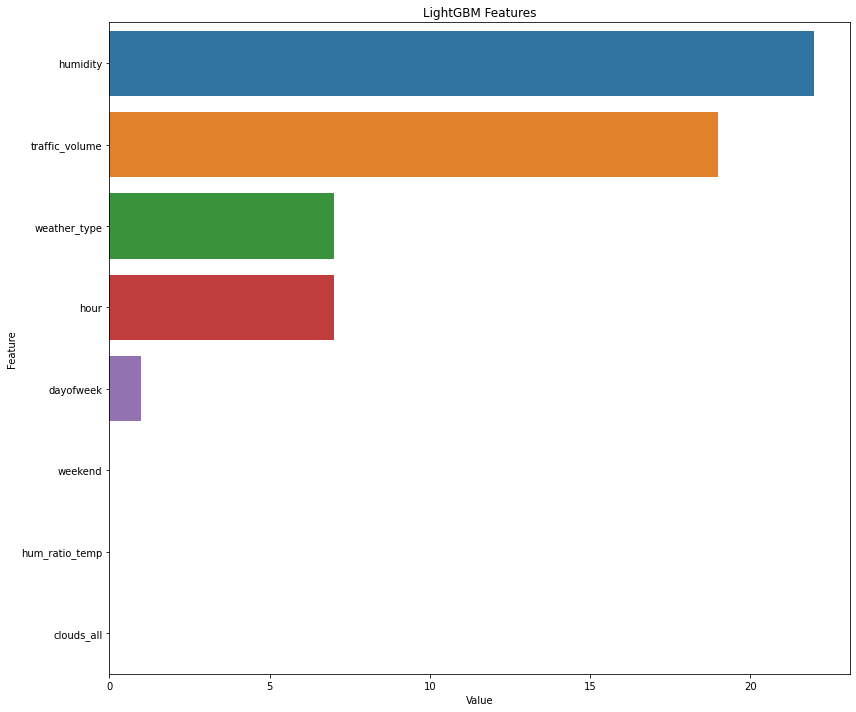

In [0]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [0]:
Xtest = test_df

In [0]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=
             10, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(boosting_type='gbdt', num_leaves=500, max_depth=31, learning_rate=0.1, n_estimators=1000, min_child_samples=20, subsample=0.80)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=100)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_absolute_error(y_test, y_pred_lgbm)))

    errlgb.append(sqrt(mean_absolute_error(y_test, y_pred_lgbm)))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)

RMSLE LGBM:  8.4849085287269
RMSLE LGBM:  8.454548417396987
RMSLE LGBM:  8.56750055203291
RMSLE LGBM:  8.502815347248458
RMSLE LGBM:  8.482695933224678
RMSLE LGBM:  8.549828806622786
RMSLE LGBM:  8.614437680792681
RMSLE LGBM:  8.526719053733745
RMSLE LGBM:  8.491859185632498
RMSLE LGBM:  8.483043559955801


In [0]:
100-np.mean(errlgb,0)

91.48416429346325

In [0]:
lgbm_final=y_pred_totlgb[0]*0.6+y_pred_totlgb[1]*0.4

In [0]:
lgbm_final = np.mean(y_pred_totlgb,0)
lgbm_final

array([154.84030423, 154.83714733, 154.85315859, ..., 154.84329544,
       154.83554219, 154.84364468])

In [0]:
submission = pd.DataFrame({
        "date_time": out1,
        "air_pollution_index": lgbm_final
    })
submission.to_csv('./submission.csv', index=False)
print(submission)

                date_time  air_pollution_index
0     2017-05-18 00:00:00           154.840304
1     2017-05-18 00:00:00           154.837147
2     2017-05-18 00:00:00           154.853159
3     2017-05-18 01:00:00           154.837321
4     2017-05-18 01:00:00           154.837321
...                   ...                  ...
14449 2018-09-30 19:00:00           154.838540
14450 2018-09-30 20:00:00           154.842497
14451 2018-09-30 21:00:00           154.843295
14452 2018-09-30 22:00:00           154.835542
14453 2018-09-30 23:00:00           154.843645

[14454 rows x 2 columns]


In [0]:
from google.colab import files
files.download('submission.csv')

# 2nd Method

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(verbose=1, learning_rate=0.1, n_estimators=100, random_state=101, subsample=0.8, loss='ls')
gb.fit(X_train, y_train)
y_pred = gb.predict(X_cv)
print('score', 100-sqrt(mean_absolute_error(y_cv, y_pred)))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1        7066.1912          -0.0187            2.99s
         2        7025.1216          -1.7648            2.92s
         3        7043.2419          -1.7668            2.86s
         4        7040.8202          -1.1068            2.81s
         5        7034.6119          -0.4202            2.75s
         6        7028.0328          -2.1607            2.72s
         7        7050.7493          -2.5959            2.68s
         8        7007.7005          -0.8201            2.64s
         9        7009.2450          -0.2145            2.61s
        10        7011.5923          -2.0141            2.57s
        20        7018.8569          -0.3527            2.25s
        30        6982.2896           0.7286            1.97s
        40        6945.7669          -0.4668            1.68s
        50        6955.2838          -1.3805            1.40s
        60        6918.1066           0.0705            1.12s
       

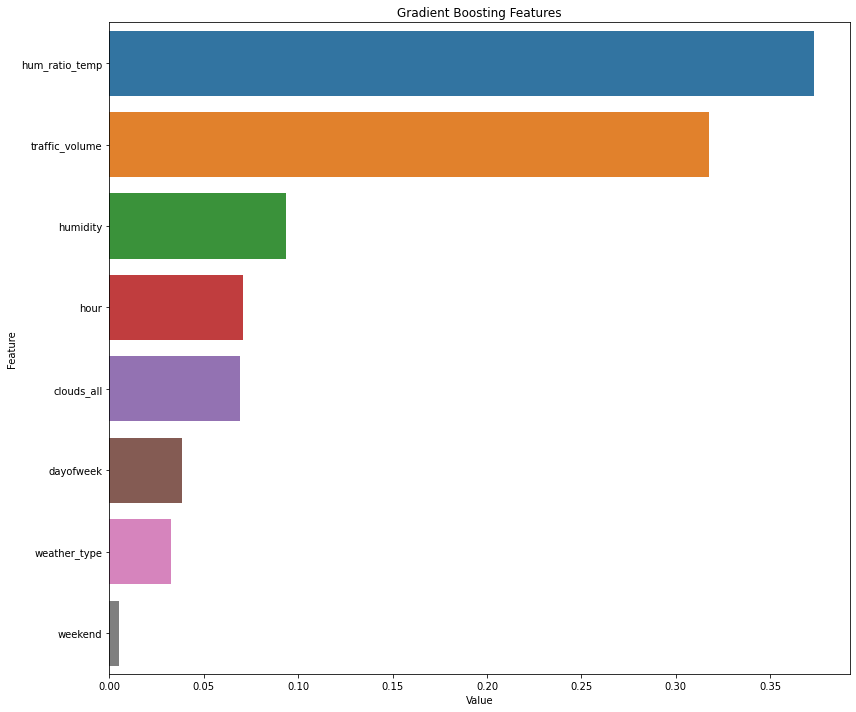

In [0]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(gb.feature_importances_, X.columns), reverse=True)[:60], columns=['Value','Feature'])
plt.figure(figsize=(12,10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Gradient Boosting Features')
plt.tight_layout()
plt.show()

In [0]:
from math import sqrt 
from sklearn.metrics import accuracy_score, mean_squared_error

In [0]:
Xtest = test_df

In [0]:
from sklearn.model_selection import KFold

errgb = []
y_pred_totgb = []

fold = KFold(n_splits=20, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
             
    gb = GradientBoostingRegressor(learning_rate=0.001, n_estimators=100, random_state=101, subsample=0.8, loss='ls')
    #gb = GradientBoostingRegressor(learning_rate=0.01, n_estimators=100, random_state=101, subsample=0.8,loss='ls')
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    print('Score', 100-sqrt(mean_absolute_error(y_test, y_pred)))

    errgb.append(sqrt(mean_absolute_error(y_test, y_pred)))
    p = gb.predict(Xtest)
    y_pred_totgb.append(p)

Score 91.5122446366152
Score 91.51667181203467
Score 91.56239848647688
Score 91.52608737084883
Score 91.37238199292756
Score 91.49446508936417
Score 91.4385188965602
Score 91.55460255797144
Score 91.51540333900144
Score 91.52683361362003
Score 91.4274566279839
Score 91.4705070425912
Score 91.3892111580951
Score 91.37974196790184
Score 91.42210728755298
Score 91.52130418266579
Score 91.3947774320759
Score 91.62577822137303
Score 91.59616420618448
Score 91.43830732588722


In [0]:
np.mean(errgb,0)

8.515751837613411

In [0]:
cat_final = np.mean(y_pred_totgb,0)
cat_final

array([154.86803994, 154.85767586, 154.8610544 , ..., 154.71972555,
       154.78821886, 154.89562991])

In [0]:
submission = pd.DataFrame({
        "date_time": out1,
        "air_pollution_index": cat_final
    })
submission.to_csv('./He_air.csv', index=False)
print(submission)

                date_time  air_pollution_index
0     2017-05-18 00:00:00           154.868040
1     2017-05-18 00:00:00           154.857676
2     2017-05-18 00:00:00           154.861054
3     2017-05-18 01:00:00           154.844148
4     2017-05-18 01:00:00           154.844148
...                   ...                  ...
14449 2018-09-30 19:00:00           154.590280
14450 2018-09-30 20:00:00           154.796064
14451 2018-09-30 21:00:00           154.719726
14452 2018-09-30 22:00:00           154.788219
14453 2018-09-30 23:00:00           154.895630

[14454 rows x 2 columns]


In [0]:
from google.colab import files
files.download('He_air.csv')

# Ensembling

In [0]:
from google.colab import files
files.upload()

Saving 42c41b346cb2.csv to 42c41b346cb2.csv


{'42c41b346cb2.csv': b'"predict"\n147.903697227164\n148.61718601197452\n151.81446846825858\n147.4651167247319\n148.11583692156364\n147.17197735053327\n147.9496938340605\n152.11355501446786\n148.14471373059632\n148.80360660189083\n151.31551845197316\n149.92945330555992\n150.6249771143564\n152.72817205239218\n151.8409194273192\n152.47349622238997\n152.72817205239218\n152.6439255241233\n153.44421637793968\n155.7500837068928\n158.95895072080665\n154.89276100092886\n159.213654646981\n158.62901684169213\n155.91961226922294\n157.29495571732585\n160.79221137266416\n155.1545526871251\n159.6424581616368\n155.82541415671932\n155.63785121263422\n154.91970470653925\n157.8183546333625\n158.20235512991465\n158.48114557364948\n155.98216161865287\n153.99765436199147\n152.72817205239218\n152.72817205239218\n152.72817205239218\n152.72817205239218\n152.72817205239218\n152.72817205239218\n152.72817205239218\n152.72817205239218\n152.72817205239218\n152.72817205239218\n152.72817205239218\n154.95638140206816\

In [0]:
p=pd.read_csv('bacba44dcfeb.csv')

In [0]:
q=pd.read_csv('91.51572.csv')

In [0]:
r=pd.read_csv('He_air (23).csv')

In [0]:
s=pd.read_csv('42c41b346cb2.csv')

In [0]:
ensem=p['predict']*0.6+r['air_pollution_index']*0.4

In [0]:
submission = pd.DataFrame({
        "date_time": out1,
        "air_pollution_index": ensem
    })
submission.to_csv('./He_air.csv', index=False)
print(submission)

                date_time  air_pollution_index
0     2017-05-18 00:00:00           154.263882
1     2017-05-18 00:00:00           154.257463
2     2017-05-18 00:00:00           153.617310
3     2017-05-18 01:00:00           150.800212
4     2017-05-18 01:00:00           150.783418
...                   ...                  ...
14449 2018-09-30 19:00:00           146.735660
14450 2018-09-30 20:00:00           153.632607
14451 2018-09-30 21:00:00           150.314548
14452 2018-09-30 22:00:00           155.132545
14453 2018-09-30 23:00:00           153.653538

[14454 rows x 2 columns]


In [0]:
from google.colab import files
files.download('He_air.csv')